<a href="https://colab.research.google.com/github/Aparajithashri/Learn/blob/master/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LINEAR REGRESSION

##Predict the grade using linear regression

In [ ]:
 import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Actual Grade
    y
29  9
4   8
26  8
30  8
32  9
37  6
34  8
40  8
7   9
10  8
Predicted Grade
[[9.]
 [8.]
 [8.]
 [9.]
 [9.]
 [8.]
 [9.]
 [8.]
 [8.]
 [8.]]


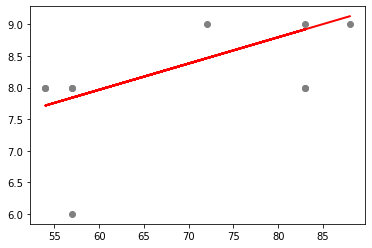

Mean Absolute Error: 0.5314562733880778
Mean Squared Error: 0.5604384721760381
Root Mean Squared Error: 0.7486243865758303


In [ ]:
data= pd.read_csv('marksheet.csv')
data.columns=['x','y']
X=data.iloc[:,data.columns!='y']
Y=data.iloc[:,data.columns=='y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)
model =LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("Actual Grade")
print(Y_test)
print("Predicted Grade")
print (np.round(y_pred))
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))